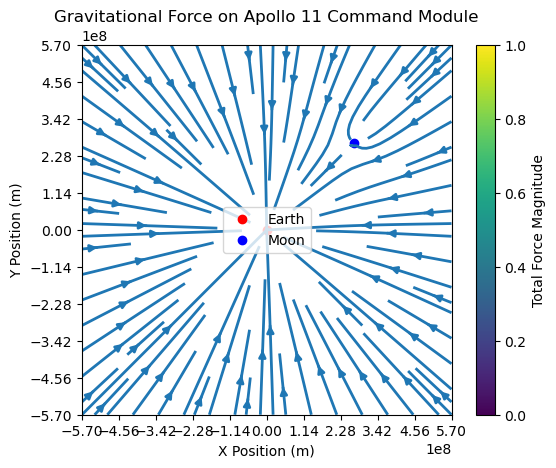

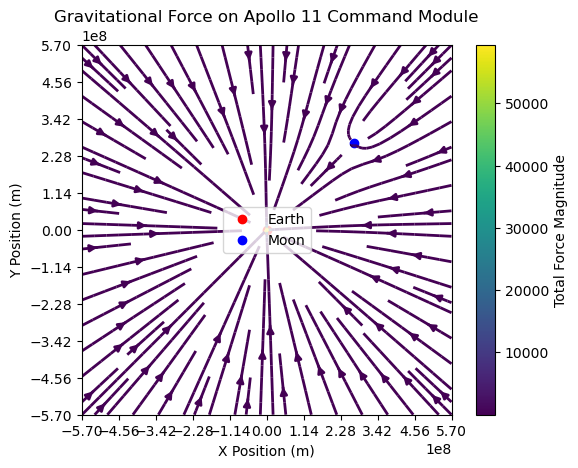

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Constants
G = 6.67 * (10**(-11))  # Gravitational constant

# Given data
earth_m = 5.9 * (10**24)  # Mass of the Earth (kg)
earth_x = 0  # Earth's x position (origin)
earth_y = 0  # Earth's y position (origin)
distance_em = 3.8 * (10**8)  # Distance between Earth and Moon (m)
mass_m = 7.3 * (10**22)  # Mass of the Moon (kg)
mass_rocket = 10000  # Mass of the Apollo 11 command module (kg)

# Moon position (d⊕√2, d⊕√2)
moon_x = distance_em / np.sqrt(2)
moon_y = distance_em / np.sqrt(2)

# Function to calculate gravitational force components Fx and Fy
def force(m1, m2, x1, y1, x2, y2):
    # Calculate the distance between the bodies
    r_squared = (x1 - x2)**2 + (y1 - y2)**2  # squared distance between the two bodies
    r = np.sqrt(r_squared)  # actual distance
    
    # Avoid division by zero if the bodies are at the same position
    if r == 0:
        return np.nan, np.nan
    
    # Compute the unit vector in the direction from (x2, y2) to (x1, y1)
    unit_vec = np.array([(x1 - x2), (y1 - y2)]) / r
    
    # Calculate the force components in the x and y directions
    force_magnitude = (G * m1 * m2) / r_squared  # Magnitude of the gravitational force
    Fx = force_magnitude * unit_vec[0]  # Force in the x direction
    Fy = force_magnitude * unit_vec[1]  # Force in the y direction
    
    return Fx, Fy

# Create a grid of points for plotting
xm = np.linspace(-1.5 * distance_em, 1.5 * distance_em, 100)
ym = np.linspace(-1.5 * distance_em, 1.5 * distance_em, 100)
X, Y = np.meshgrid(xm, ym)

# Arrays to store force components
Fx_total = np.zeros(X.shape)
Fy_total = np.zeros(Y.shape)

# Calculate the total force on the rocket at each grid point
for a in range(X.shape[0]):
    for b in range(X.shape[1]):  # Correct the loop index for Y dimension
        # Force from Earth on the rocket
        Fx_e, Fy_e = force(earth_m, mass_rocket, earth_x, earth_y, X[a, b], Y[a, b])
        
        # Force from Moon on the rocket
        Fx_m, Fy_m = force(mass_m, mass_rocket, moon_x, moon_y, X[a, b], Y[a, b])
        
        # Sum the forces from both Earth and Moon
        Fx_total[a, b] = Fx_e + Fx_m
        Fy_total[a, b] = Fy_e + Fy_m

# Calculate the total force magnitude
F_total = np.sqrt(Fx_total**2 + Fy_total**2)

# Create the streamplot
fig, ax = plt.subplots(1, 1)

# Plot Earth and Moon positions
ax.plot([0], [0], "ro", label="Earth")  # Plot Earth position (Red)
ax.plot([moon_x], [moon_y], "bo", label="Moon")  # Plot Moon position (Blue)

# Streamplot to visualize the force field
stream = ax.streamplot(X, Y, Fx_total, Fy_total, linewidth=2, color=F_total, cmap='viridis')

# Add colorbar for the force magnitude
cbar = fig.colorbar(stream.lines, ax=ax)
cbar.set_label('Total Force Magnitude')

# Set plot limits and labels
ax.set_xlim([-1.5 * distance_em, 1.5 * distance_em])
ax.set_ylim([-1.5 * distance_em, 1.5 * distance_em])
ax.set_xticks(np.linspace(-1.5 * distance_em, 1.5 * distance_em, 11))
ax.set_yticks(np.linspace(-1.5 * distance_em, 1.5 * distance_em, 11))
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('Gravitational Force on Apollo 11 Command Module')

# Add legend
ax.legend()

# Ensure aspect ratio is equal for proper visualization
ax.set_aspect('equal')

# Show the plot
plt.show()



In [16]:
import numpy as np
m0=2.8*(10**6)
mf=7.5*(10**5)
ve=2400
m_dot=1.3*(10**4)
g=9.81
T=(m0-mf)/m_dot

def delta_v(t, m0, mf, m_dot, ve, g):
    # Calculate the mass of the rocket at time t
    m_t = m0 - m_dot * t
    
    # Ensure that the mass doesn't go below the final mass (m_f)
    if m_t < mf:
        m_t = mf
    
    # Calculate the change in velocity
    delta_v = ve * np.log(m0 / m_t) - g * t
    
    return delta_v
a=delta_v(T,m0,mf,m_dot,ve,g)
print(a)

1614.5620366575151
